## These are plots formed after saving the data across subjects run in SWRanalysis.ipynb 

In [143]:
import pandas as pd; pd.set_option('display.max_columns', 30)
import numpy as np
from cmlreaders import CMLReader, get_data_index
from ptsa.data.filters import ButterworthFilter
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
from copy import copy
from scipy import stats
import pickle
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42 # fix fonts for Illustrator
sys.path.append('/home1/john/Downloads/ptsa_plot-master/')
sys.path.append('/home1/john/johnModules')
from brain_labels import MTL_labels, LTC_labels, PFC_labels, OTHER_labels, ALL_labels # all location labels
%load_ext autoreload
%autoreload
from general import *
from SWRmodule import *

df = get_data_index("r1") # all RAM subjects
exp = 'FR1'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plot CA3 v. DG on same plot

CA1: 3211 recalls
Test 1 p-value: 0.8551984742479201
Test 2 p-value: 0.8407443735077846
Dentate gyrus: 2397 recalls
Test 1 p-value: 0.6640347671201461
Test 2 p-value: 0.9461553452498093


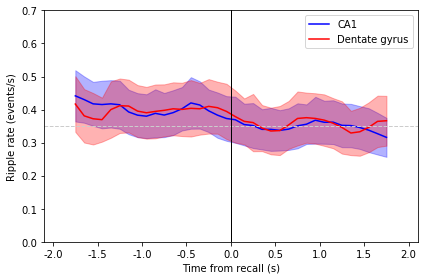

In [129]:
# load data from each

selected_period = 'surrounding_recall' 
remove_soz_ictal = False
recall_type_switch = 1 # 0 for original, 1 for only those with subsequent, 2 for second recalls only, 3 for isolated recalls
region_name = 'HPC'
# location_selected = 'ca1' # 'ca3' # 'dg' 'ca1' # sub # left hippocampus # right hippocampus # hippocampus
# # (leave as '' if not HPC)

pad = 2
psth_start = -2000
psth_end = 2000
stats_bin = 500 # time bin width in ms to test stats on
first_start = -1600 # going to make sequence of 3 bins and test 1st v. 3rd
first_end = -100
second_start = 200 # same idea
second_end = 1700

# get strings for path name for save and loading cluster data
soz_label,recall_selection_name,subfolder = getSWRpathInfo(remove_soz_ictal,recall_type_switch,selected_period)

for p,location_selected in enumerate(['ca1','dg']):
    
    if p==0:
        subplots(1,1,figsize=(6,4)); ax = plt.gca()
        color = (0,0,1)
        label = 'CA1'
        line_dist = 0.175
    else:
        color = (1,0,0)
        label = 'Dentate gyrus'
        line_dist = 0.15

    path_name = '/home1/john/SWR/figures/'+subfolder
    fn = os.path.join(path_name,
        'SWR_'+exp+'_'+region_name+'_'+location_selected+'_'+str(recall_type_switch)+'_'+soz_label+'.p')            
    with open(fn,'rb') as f:
        dat = pickle.load(f)
        bin_centers = dat['bin_centers']; PSTH = dat['PSTH']; CI_plot = dat['CI_plot']; num_trials = dat['num_trials'];
        bin_model1 = dat['bin_model1']; bin_model2 = dat['bin_model2']

    # make plot
    xr = bin_centers #np.arange(psth_start,psth_end,binsize)

    # plot smoothed mean +/- CI
    if pad > 0:
        plot(xr[pad:-pad],PSTH[pad:-pad],color=color)
        fill_between(xr[pad:-pad], PSTH[pad:-pad]-CI_plot[0,:], PSTH[pad:-pad]+CI_plot[0,:],
                     color=color, alpha = 0.3, label='_nolegend_')
    else:
        plot(xr,PSTH)
        fill_between(xr, PSTH-CI_plot[0,:], PSTH+CI_plot[0,:],
                     color=color, alpha = 0.3, label='_nolegend_')

    # plot bands of significance
    if bin_model1.pvalues[1] < 0.05:
        plot([first_end-stats_bin,first_end],[line_dist,line_dist],'--',
             color=color,label='_nolegend_')
    if bin_model2.pvalues[1] < 0.05:
        plot([second_start,second_start+stats_bin],[line_dist,line_dist],'--',
             color=color,label='_nolegend_')
    print(label+': '+str(num_trials)+' recalls')
    print('Test 1 p-value: '+str(bin_model1.pvalues[1]))
    print('Test 2 p-value: '+str(bin_model2.pvalues[1]))

xticks(np.arange(psth_start,psth_end+1,500),np.arange(psth_start/1000,psth_end/1000+1,500/1000))
xlabel('Time from recall (s)')
ylabel('Ripple rate (events/s)')
ylim = 0.7 # keep it here since occasionally CIs get kinda high
ax.set_ylim(0,ylim)
ax.set_xlim(psth_start-100,psth_end+100)
plot([ax.get_xlim()[0],ax.get_xlim()[1]],[0.35,0.35],linewidth=1,linestyle='--',color=(0.8,0.8,0.8),label='_nolegend_')
plot([0,0],[ax.get_ylim()[0],ax.get_ylim()[1]],linewidth=1,linestyle='-',color=(0,0,0),label='_nolegend_')
ax.legend({'CA1','Dentate gyrus'})
tight_layout()
plt.show()
a=1;
a=1;

## Single data plots

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2ae2808bbd90>)

KeyError: 'session_name_array'

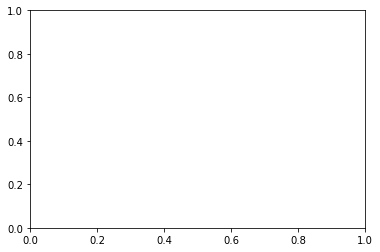

In [192]:
# load data from each

selected_period = 'surrounding_recall' 
remove_soz_ictal = False
recall_type_switch = 3 # 0 for original, 1 for only those with subsequent, 2 for second recalls only, 3 for isolated recalls
region_name = 'ENT' #'ENT' #'HPC' #HPC_ENT #ENT #HPC # PHC 
location_selected = '' #'ca1' # 'ca3' # 'dg' 'ca1' # sub # left hippocampus # right hippocampus # hippocampus
# # (leave as '' if not HPC)

legend_name = 'Entorhinal cortex' #'Parahippocampal cortex' #'Entorhinal'
color = (0.5,0.5,0) # (0.5,0.5,0)
line_dist = 0.175

pad = 2
psth_start = -2000
psth_end = 2000
stats_bin = 500 # time bin width in ms to test stats on
first_start = -1600 # going to make sequence of 3 bins and test 1st v. 3rd
first_end = -100
second_start = 200 # same idea
second_end = 1700

# get strings for path name for save and loading cluster data
soz_label,recall_selection_name,subfolder = getSWRpathInfo(remove_soz_ictal,recall_type_switch,selected_period)

subplots(1,1,figsize=(6,4)); ax2 = plt.gca()

path_name = '/home1/john/SWR/figures/'+subfolder
fn = os.path.join(path_name,
    'SWR_'+exp+'_'+region_name+'_'+location_selected+'_'+str(recall_type_switch)+'_'+soz_label+'.p')            
with open(fn,'rb') as f:
    dat = pickle.load(f)
    bin_centers = dat['bin_centers']; PSTH = dat['PSTH']; CI_plot = dat['CI_plot']; num_trials = dat['num_trials'];
    bin_model1 = dat['bin_model1']; bin_model2 = dat['bin_model2']; ss = dat['session_name_array']

# make plot
xr = bin_centers #np.arange(psth_start,psth_end,binsize)

# plot smoothed mean +/- CI
if pad > 0:
    plot(xr[pad:-pad],PSTH[pad:-pad],color=color);
    fill_between(xr[pad:-pad], PSTH[pad:-pad]-CI_plot[0,:], PSTH[pad:-pad]+CI_plot[0,:],
                 color=color, alpha = 0.3, label='_nolegend_');
else:
    plot(xr,PSTH);
    fill_between(xr, PSTH-CI_plot[0,:], PSTH+CI_plot[0,:],
                 color=color, alpha = 0.3, label='_nolegend_');

# plot bands of significance
if bin_model1.pvalues[1] < 0.05:
    plot([first_end-stats_bin,first_end],[line_dist,line_dist],'--',
         color=color,label='_nolegend_');
if bin_model2.pvalues[1] < 0.05:
    plot([second_start,second_start+stats_bin],[line_dist,line_dist],'--',
         color=color,label='_nolegend_');
print(legend_name+': '+str(num_trials)+' recalls')
print('Test 1 p-value: '+str(bin_model1.pvalues[1]))
print('Test 2 p-value: '+str(bin_model2.pvalues[1]))

xticks(np.arange(psth_start,psth_end+1,500),np.arange(psth_start/1000,psth_end/1000+1,500/1000))
xlabel('Time from recall (s)')
ylabel('Ripple rate (events/s)')
ylim = 0.7 # keep it here since occasionally CIs get kinda high
ax2.set_ylim(0,ylim)
ax2.set_xlim(psth_start-100,psth_end+100)
plot([ax2.get_xlim()[0],ax2.get_xlim()[1]],[0.35,0.35],linewidth=1,linestyle='--',color=(0.8,0.8,0.8),label='_nolegend_')
plot([0,0],[ax2.get_ylim()[0],ax2.get_ylim()[1]],linewidth=1,linestyle='-',color=(0,0,0),label='_nolegend_')
plt.legend({legend_name})
tight_layout()
print(legend_name+': '+str(num_trials)+' recalls')
print('Test 1 p-value: '+str(bin_model1.pvalues[1]))
print('Test 2 p-value: '+str(bin_model2.pvalues[1]))
a=1;
soz_label,recall_selection_name,subfolder = getSWRpathInfo(remove_soz_ictal,recall_type_switch,selected_period)

# Comparison plots for clustering

/home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


High clustering lists: 5572 recalls
Low clustering lists: 5992 recalls
Test 1 comparison p-value: 0.026720014977698506
Test 2 comparison p-value: 0.6526245031374507


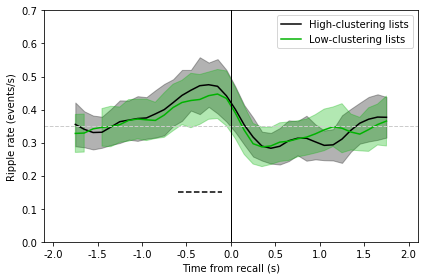

In [183]:
# load data from each

selected_period = 'surrounding_recall' 
remove_soz_ictal = False
recall_type_switch = 3 # 0 for original, 1 for only those with subsequent, 2 for second recalls only, 3 for isolated recalls
region_name = 'HPC'
# location_selected = 'ca1' # 'ca3' # 'dg' 'ca1' # sub # left hippocampus # right hippocampus # hippocampus
# # (leave as '' if not HPC)

min_recalls = 4 # minimum recalls/list

pad = 2
psth_start = -2000
psth_end = 2000
stats_bin = 500 # time bin width in ms to test stats on
first_start = -1600 # going to make sequence of 3 bins and test 1st v. 3rd
first_end = -100
second_start = 200 # same idea
second_end = 1700

# get strings for path name for save and loading cluster data
soz_label,recall_selection_name,subfolder = getSWRpathInfo(remove_soz_ictal,recall_type_switch,selected_period)

session_accum = np.array([])
subject_accum = copy(session_accum)
ripple_accum1 = copy(session_accum)
ripple_accum2 = copy(session_accum)
category = copy(session_accum)

for p,upper_label in enumerate(['upper','lower']):
    
    location_selected = ''
    if p==0:
        subplots(1,1,figsize=(6,4)); ax = plt.gca()
        color = (0,0,0)
        line_dist = 0.175
    else:
        color = (0,0.7,0)
        line_dist = 0.15

    path_name = '/home1/john/SWR/figures/'+subfolder
    fn = os.path.join(path_name,
        'SWRCLUSTER_'+exp+'_'+region_name+'_'+location_selected+'_'+str(recall_type_switch)+
                      '_'+soz_label+'_recalls-'+str(min_recalls)+'_'+upper_label+'.p')          
    with open(fn,'rb') as f:
        dat = pickle.load(f)
        bin_centers = dat['bin_centers']; PSTH = dat['PSTH']; CI_plot = dat['CI_plot']; num_trials = dat['num_trials'];
        bin_model1 = dat['bin_model1']; bin_model2 = dat['bin_model2'];
        binned_first_stats_array = dat['binned_first_stats_array'];binned_second_stats_array = dat['binned_second_stats_array'];
        subject_name_array = dat['subject_name_array'];session_name_array = dat['session_name_array']

    # make plot
    xr = bin_centers #np.arange(psth_start,psth_end,binsize)

    # plot smoothed mean +/- CI
    if pad > 0:
        plot(xr[pad:-pad],PSTH[pad:-pad],color=color)
        fill_between(xr[pad:-pad], PSTH[pad:-pad]-CI_plot[0,:], PSTH[pad:-pad]+CI_plot[0,:],
                     color=color, alpha = 0.3, label='_nolegend_')
    else:
        plot(xr,PSTH)
        fill_between(xr, PSTH-CI_plot[0,:], PSTH+CI_plot[0,:],
                     color=color, alpha = 0.3, label='_nolegend_')

    ## for comparison do ME stats between high and low clustering directly
    session_accum = np.append(session_accum,session_name_array)
    subject_accum = np.append(subject_accum,subject_name_array)
    ripple_accum1 = np.append(ripple_accum1,binned_first_stats_array[:,2]) # 0:2 are -1600:-100 in 500 ms bins
    ripple_accum2 = np.append(ripple_accum2,binned_second_stats_array[:,0]) # 0:2 are 200:1700 in 500 ms bins
    category = np.append(category,np.tile(p,len(session_name_array)))
    
    if p == 1:  # have predictors accumulated for comparison now               
        import statsmodels.formula.api as smf
        
        # pre-recall bump 1st
        bin_df = pd.DataFrame(data={'session':session_accum,'subject':subject_accum,
                               'category':category,'ripple_rates':ripple_accum1})
        vc = {'session':'0+session'}
        sig_bin_model = smf.mixedlm("ripple_rates ~ category", bin_df, groups="subject", vc_formula=vc)
        bin_model1 = sig_bin_model.fit(reml=False, method='nm')
        
        # post_recall valley 2nd
        bin_df = pd.DataFrame(data={'session':session_accum,'subject':subject_accum,
                               'category':category,'ripple_rates':ripple_accum2})
        sig_bin_model = smf.mixedlm("ripple_rates ~ category", bin_df, groups="subject", vc_formula=vc)
        bin_model2 = sig_bin_model.fit(reml=False, method='nm')        
        
        if bin_model1.pvalues[1] < 0.05:
            plot([-600,-600+stats_bin],[line_dist,line_dist],'--',
                 color=(0,0,0),label='_nolegend_')
        if bin_model2.pvalues[1] < 0.05:
            plot([second_start,second_start+stats_bin],[line_dist,line_dist],'--',
                 color=(0,0,0),label='_nolegend_')
            
        print('High clustering lists'+': '+str(sum(category==0))+' recalls')
        print('Low clustering lists'+': '+str(sum(category==1))+' recalls')
        print('Test 1 comparison p-value: '+str(bin_model1.pvalues[1]))
        print('Test 2 comparison p-value: '+str(bin_model2.pvalues[1]))

xticks(np.arange(psth_start,psth_end+1,500),np.arange(psth_start/1000,psth_end/1000+1,500/1000))
xlabel('Time from recall (s)')
ylabel('Ripple rate (events/s)')
ylim = 0.7 # keep it here since occasionally CIs get kinda high
ax.set_ylim(0,ylim)
ax.set_xlim(psth_start-100,psth_end+100)
plot([ax.get_xlim()[0],ax.get_xlim()[1]],[0.35,0.35],linewidth=1,linestyle='--',color=(0.8,0.8,0.8),label='_nolegend_')
plot([0,0],[ax.get_ylim()[0],ax.get_ylim()[1]],linewidth=1,linestyle='-',color=(0,0,0),label='_nolegend_')
ax.legend({'High-clustering lists','Low-clustering lists'})
tight_layout()
a=1;

## look through individual subjects to compare HPC v. ENT and HPC v. PHC directly

In [184]:
# load data from each

selected_period = 'surrounding_recall' 
remove_soz_ictal = False
recall_type_switch = 3 # 0 for original, 1 for only those with subsequent, 2 for second recalls only, 3 for isolated recalls
regions_to_compare = ['HPC','ENT'] # 'PHC'
location_selected = 'ca1' # 'ca3' # 'dg' 'ca1' # sub # left hippocampus # right hippocampus # hippocampus
# put '' for no subregions, len=1 in for subregion for HPC above, or len=2 (e.g. ['ca1','dg']) to compare regions

pad = 2
psth_start = -2000
psth_end = 2000
stats_bin = 500 # time bin width in ms to test stats on
first_start = -1600 # going to make sequence of 3 bins and test 1st v. 3rd
first_end = -100
second_start = 200 # same idea
second_end = 1700

# get strings for path name for save and loading cluster data
soz_label,recall_selection_name,subfolder = getSWRpathInfo(remove_soz_ictal,recall_type_switch,selected_period)

session_accum = np.array([])
subject_accum = copy(session_accum)
ripple_accum1 = copy(session_accum)
ripple_accum2 = copy(session_accum)
category = copy(session_accum)

import ipdb; ipdb.set_trace()
for p,region in enumerate(regions_to_compare):
    
    # select subregion if necessary
    temp_loc = ''
    if len(location_selected) == 2:
        temp_loc = location_selected[p]
    elif len(location_selected) == 1:
        if region == 'HPC':
            temp_loc = location_selected            

    path_name = '/home1/john/SWR/figures/'+subfolder
    fn = os.path.join(path_name,
        'SWRCLUSTER_'+exp+'_'+region+'_'+temp_loc+'_'+str(recall_type_switch)+
                      '_'+soz_label+'.p')          
    with open(fn,'rb') as f:
        dat = pickle.load(f)
        if p == 0:
            data1_test1 = dat['binned_first_stats_array']; data1_test2 = dat['binned_second_stats_array'];
            subs1 = dat['subject_name_array']; sessions1 = dat['session_name_array']
        else:
            data2_test1 = dat['binned_first_stats_array']; data2_test2 = dat['binned_second_stats_array'];
            subs2 = dat['subject_name_array']; sessions2 = dat['session_name_array']

# now you have sets of data loaded for two regions along with sub/sess for each-->
# search across the subjects to find which subjects have electrodes in both regions

unique_subs1 = np.unique(subs1)    
unique_subs2 = np.unique(subs2)
for s in unique_subs2: # this one should have fewer since always putting non-temp_loc one 2nd
    if s in unique_subs1:
        # has electrodes in both! Now do a mixed model just for this subject
        a=1;


import ipdb; ipdb.set_trace()

        
        
## for comparison do ME stats between high and low clustering directly
session_accum = np.append(session_accum,session_name_array)
subject_accum = np.append(subject_accum,subject_name_array)
ripple_accum1 = np.append(ripple_accum1,binned_first_stats_array[:,2]) # 0:2 are -1600:-100 in 500 ms bins
ripple_accum2 = np.append(ripple_accum2,binned_second_stats_array[:,0]) # 0:2 are 200:1700 in 500 ms bins
category = np.append(category,np.tile(p,len(session_name_array)))
    
if p == 1:  # have predictors accumulated for comparison now               
    import statsmodels.formula.api as smf

    # pre-recall bump 1st
    bin_df = pd.DataFrame(data={'session':session_accum,'subject':subject_accum,
                           'category':category,'ripple_rates':ripple_accum1})
    vc = {'session':'0+session'}
    sig_bin_model = smf.mixedlm("ripple_rates ~ category", bin_df, groups="subject", vc_formula=vc)
    bin_model1 = sig_bin_model.fit(reml=False, method='nm')

    # post_recall valley 2nd
    bin_df = pd.DataFrame(data={'session':session_accum,'subject':subject_accum,
                           'category':category,'ripple_rates':ripple_accum2})
    sig_bin_model = smf.mixedlm("ripple_rates ~ category", bin_df, groups="subject", vc_formula=vc)
    bin_model2 = sig_bin_model.fit(reml=False, method='nm')        

    if bin_model1.pvalues[1] < 0.05:
        plot([-600,-600+stats_bin],[line_dist,line_dist],'--',
             color=(0,0,0),label='_nolegend_')
    if bin_model2.pvalues[1] < 0.05:
        plot([second_start,second_start+stats_bin],[line_dist,line_dist],'--',
             color=(0,0,0),label='_nolegend_')

    print('High clustering lists'+': '+str(sum(category==0))+' recalls')
    print('Low clustering lists'+': '+str(sum(category==1))+' recalls')
    print('Test 1 comparison p-value: '+str(bin_model1.pvalues[1]))
    print('Test 2 comparison p-value: '+str(bin_model2.pvalues[1]))

xticks(np.arange(psth_start,psth_end+1,500),np.arange(psth_start/1000,psth_end/1000+1,500/1000))
xlabel('Time from recall (s)')
ylabel('Ripple rate (events/s)')
ylim = 0.7 # keep it here since occasionally CIs get kinda high
ax.set_ylim(0,ylim)
ax.set_xlim(psth_start-100,psth_end+100)
plot([ax.get_xlim()[0],ax.get_xlim()[1]],[0.35,0.35],linewidth=1,linestyle='--',color=(0.8,0.8,0.8),label='_nolegend_')
plot([0,0],[ax.get_ylim()[0],ax.get_ylim()[1]],linewidth=1,linestyle='-',color=(0,0,0),label='_nolegend_')
ax.legend({'High-clustering lists','Low-clustering lists'})
tight_layout()
a=1;

--Call--
> /home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/IPython/core/displayhook.py(252)__call__()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.



ipdb>  u


> <ipython-input-184-943f513cfba0>(30)<module>()
     29 
---> 30 import ipdb; ipdb.set_trace()
     31 for p,upper_label in enumerate(regions_to_compare):



ipdb>  l


     25 subject_accum = copy(session_accum)
     26 ripple_accum1 = copy(session_accum)
     27 ripple_accum2 = copy(session_accum)
     28 category = copy(session_accum)
     29 
---> 30 import ipdb; ipdb.set_trace()
     31 for p,upper_label in enumerate(regions_to_compare):
     32 
     33     location_selected = ''
     34     if p==0:
     35         subplots(1,1,figsize=(6,4)); ax = plt.gca()



ipdb>  session_name_array


array(['R1002P-0', 'R1002P-0', 'R1002P-0', ..., 'R1342M-0', 'R1342M-0',
       'R1342M-0'], dtype='<U8')
--KeyboardInterrupt--


ipdb>  q


BdbQuit: 